### Martina Crippa - 915326

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1 - SOLUTION</span>

All c++ code is stored into exercize_xx/es_xx.x.x folder, for every point of exercizes.
All data are stored into exercize_xx/data/ folder.

In [12]:
# Common lib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

<font color="red">1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

Data used:

| throws | blocks | 
|--------|--------|
| $10^5$ | $10^2$ |

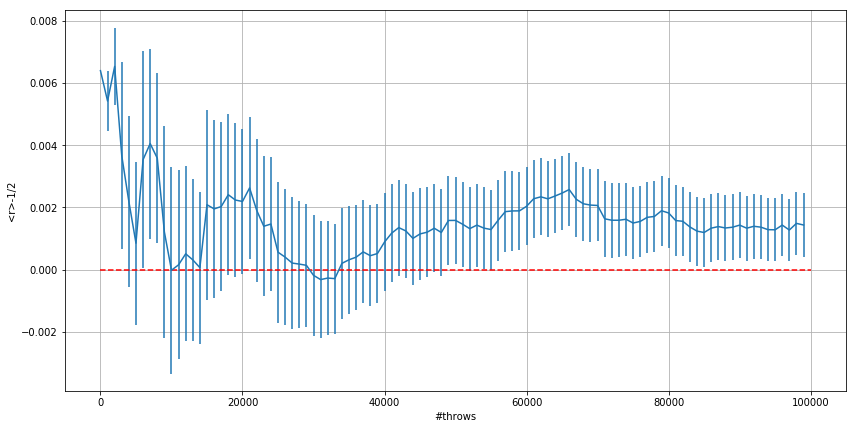

In [19]:
# To read data from file
x1, y1, err_prog1 = np.loadtxt("data/output_es01.1.1.dat", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')
plt.figure(figsize=(14,7))
plt.errorbar(x1,y1,yerr=err_prog1)
# Plot horizontal line at y, from xmin to xmax
plt.hlines(0, 0, 100000, colors='r', linestyles='dashed')
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()


<font color="red">2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

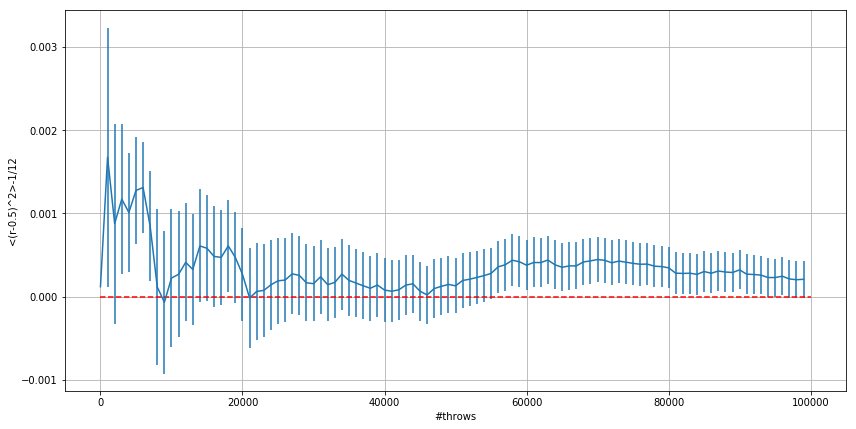

In [20]:
x2, y2, err_prog2 = np.loadtxt("data/output_es01.1.2.dat", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')
plt.figure(figsize=(14,7))
plt.errorbar(x2,y2,yerr=err_prog2)
plt.hlines(0, 0, 100000, colors='r', linestyles='dashed')
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

 <font color="red"> 3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$</font>. 

Data used:

| throws | blocks | sub interval |
|--------|--------|--------------|
| $10^4$ | $10^2$ |    $10^2$    |

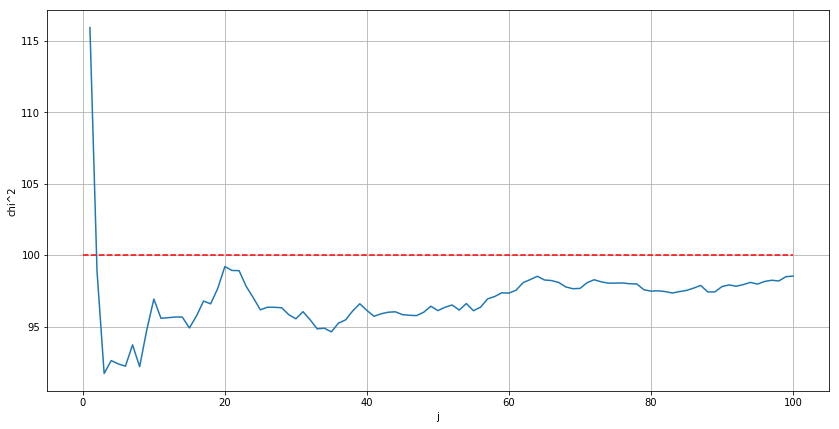

In [21]:
x, y = np.loadtxt("data/output_es01.1.3.dat",\
                  usecols=(0,1), delimiter=' ', unpack='true')
plt.figure(figsize=(14,7))
plt.plot(x,y)
plt.hlines(100, 0, 100, colors='r', linestyles='dashed')
plt.xlabel('j')
plt.ylabel('chi^2')
plt.grid(True)
plt.show()

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

 <font color="red">1. Add two probability distributions by using the **method of the inversion of the cumulative distribution** to sample from a **generic** exponential distribution, and a **generic** Cauchy-Lorentz distribution <font color="red">.
<font color="red">2. Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

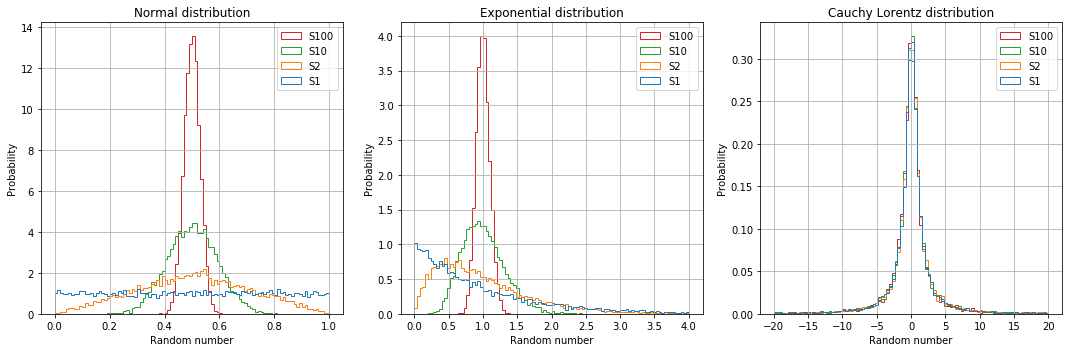

In [22]:
S1st = np.loadtxt("data/output_es01.2_st1.dat", usecols=1)
S2st = np.loadtxt("data/output_es01.2_st2.dat", usecols=1)
S10st = np.loadtxt("data/output_es01.2_st10.dat", usecols=1)
S100st = np.loadtxt("data/output_es01.2_st100.dat", usecols=1)

S1exp = np.loadtxt("data/output_es01.2_exp1.dat", usecols=1)
S2exp = np.loadtxt("data/output_es01.2_exp2.dat", usecols=1)
S10exp = np.loadtxt("data/output_es01.2_exp10.dat", usecols=1)
S100exp = np.loadtxt("data/output_es01.2_exp100.dat", usecols=1)

S1cl = np.loadtxt("data/output_es01.2_cl1.dat", usecols=1)
S2cl = np.loadtxt("data/output_es01.2_cl2.dat", usecols=1)
S10cl = np.loadtxt("data/output_es01.2_cl10.dat", usecols=1)
S100cl = np.loadtxt("data/output_es01.2_cl100.dat", usecols=1)


n_bins=100

plt.figure(figsize=(15,5))

# Using subplot ambient to draw graphs side by side
plt.subplot(131)
plt.hist([S1st, S2st, S10st, S100st], n_bins, density=True,\
         label=['S1', 'S2', 'S10', 'S100'], range=(0,1), histtype='step')
plt.title('Normal distribution')
plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

plt.subplot(132)
plt.hist([S1exp, S2exp, S10exp, S100exp], n_bins, density=True,\
         label=['S1', 'S2', 'S10', 'S100'], range=(0,4), histtype='step')
plt.title('Exponential distribution')
plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

plt.subplot(133)
plt.hist([S1cl, S2cl, S10cl, S100cl], n_bins, density=True,\
         label=['S1', 'S2', 'S10', 'S100'], range=(-20,20), histtype='step' )
plt.title('Cauchy Lorentz distribution')
plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

plt.tight_layout()

plt.show()

3. Note that you can try to fit the case N=100 with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

In [23]:
from scipy.optimize import curve_fit

# Defining function to optimize for fitting histograms
def gauss(x,a,b,c):  
    return a * np.exp(-b*(x-c)**2)
def cauchy_lorentz(x,a,b):
    return 1/np.pi*b/((x-a)**2+b**2)

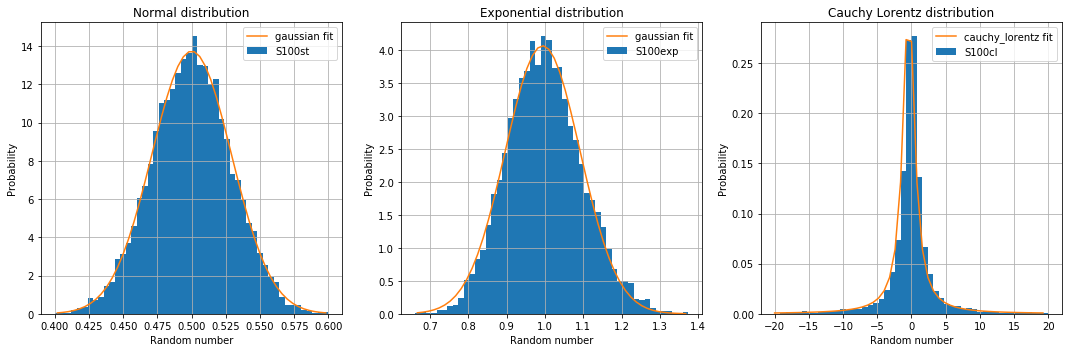

In [24]:
n_bins=50

plt.figure(figsize=(15,5))

plt.subplot(131)
data, bins, patches = plt.hist(S100st, bins=n_bins, density=True,\
                               label='S100st', range=(0.4,0.6))

# Calculate x coordinates from histogram
bin_size = abs(bins[1]-bins[0])
x=np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,\
              num=n_bins,endpoint=True)

# Fitting histograms with gauss (proving CLT)
p_opt, p_cov = curve_fit(gauss,x,data) 
y_fit = gauss(x,p_opt[0],p_opt[1], p_opt[2])

plt.plot(x,y_fit, label='gaussian fit')
plt.title('Normal distribution')
plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

plt.subplot(132)
data, bins, patches = plt.hist(S100exp, bins=n_bins, density=True,\
                               label='S100exp')

# Calculate x coordinates from histogram
bin_size = abs(bins[1]-bins[0])
x=np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,\
              num=n_bins,endpoint=True)

# Fitting histograms with gauss (proving CLT)
p_opt, p_cov = curve_fit(gauss,x,data)

y_fit = gauss(x,p_opt[0],p_opt[1], p_opt[2])
plt.plot(x,y_fit, label='gaussian fit')
plt.title('Exponential distribution')
plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

plt.subplot(133)
data, bins, patches = plt.hist(S100cl, bins=n_bins, density=True,\
                               label='S100cl', range=(-20,20))

# Calculate x coordinates from histogram
in_size = abs(bins[1]-bins[0])
x=np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,\
              num=n_bins,endpoint=True)

# Fitting histograms with cauchy-lorentz
p_opt, p_cov = curve_fit(cauchy_lorentz,x,data)
y_fit = cauchy_lorentz(x,p_opt[0],p_opt[1])

plt.plot(x,y_fit, label='cauchy_lorentz fit')
plt.title('Cauchy Lorentz distribution')
plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

plt.tight_layout()

plt.show()


We can observe that the probability distribution of the means on $N\approx100$ variables uniformily and an exponentially distribuited, tends to a Gaussian distribution, checking the Central Limit Theorem. The means of variables distributed by Cauchy-Lorentz, converge to a Cauchy-Lorentz one.

### Exercise 01.3
- Simulate the Buffon’s experiment.


<font color="red">1. Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font>.

Data used:

| L   | d | MC step | blocks | thorws |
|-----|---|---------|--------|--------|
| 0.5 | 1 | $10^3$  | $10^2$ | $10^4$ |

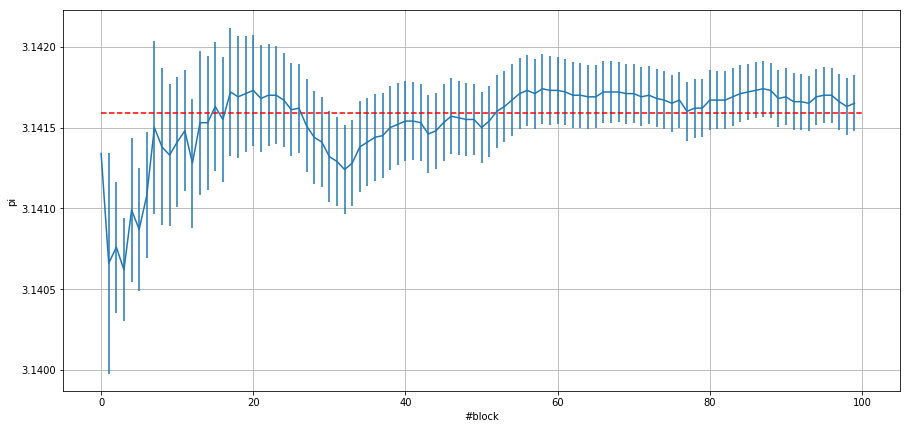

In [16]:
x3, y3, err_prog3 = np.loadtxt("data/output_es01.3.dat",\
                               usecols=(0,1,2), delimiter=' ', unpack='true')
plt.figure(figsize=(15,7))
plt.errorbar(x3,y3,yerr=err_prog3)
plt.hlines(3.14159265359, 0, 100, colors='r', linestyles='dashed')
plt.xlabel('#block')
plt.ylabel('pi')
plt.grid(True)
plt.show()

